FIRST FIVE ROW: 
   meal_id      meal_name  cuisine meal_type diet_type  calories  protein_g  \
0        1      Kid Pasta   Indian     Lunch      Keto       737       52.4   
1        2   Husband Rice  Mexican     Lunch     Paleo       182       74.7   
2        3  Activity Rice   Indian     Snack     Paleo       881       52.9   
3        4  Another Salad  Mexican     Snack      Keto       427       17.5   
4        5     Quite Stew     Thai     Lunch     Vegan       210       51.6   

   carbs_g  fat_g  fiber_g  sugar_g  sodium_mg  cholesterol_mg  \
0     43.9   34.3     16.8     42.9       2079              91   
1    144.4    0.1     22.3     38.6        423               7   
2     97.3   18.8     20.0     37.5       2383             209   
3     73.1    7.6      9.8     41.7        846             107   
4    104.3   26.3     24.8     18.2       1460              42   

   serving_size_g cooking_method  prep_time_min  cook_time_min  rating  \
0             206        Grilled     

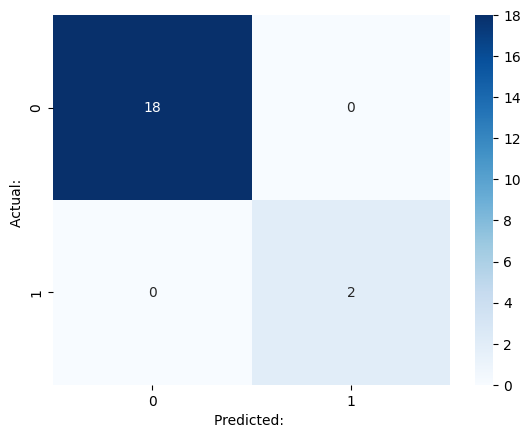

                 Model  Accuracy
0  Logistic Regression      0.95
1        Decision Tree      1.00


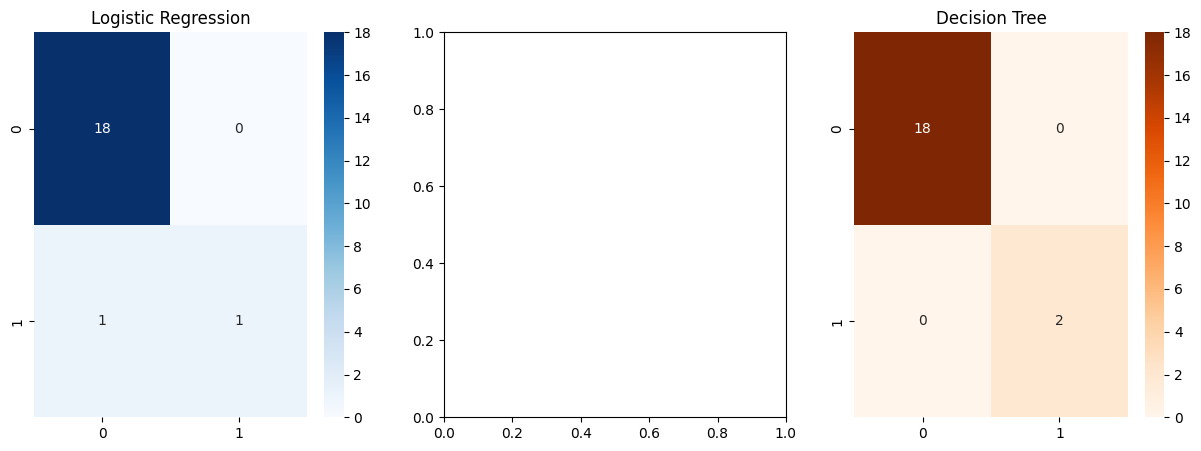

In [26]:
#import important libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

#load Dataset
df=pd.read_csv("C:/Users/Toirat PC/Downloads/archive/healthy_eating_dataset.csv")

#print first 5 rows, number of rows and columns, and the columns
print("FIRST FIVE ROW: ")
print(df.head())
print("Shape: ", df.shape)
print("Columns: ", df.columns)


#split model into train and test, including categorising into features and target
X= df[['calories','protein_g','carbs_g','fat_g','fiber_g','sugar_g','sodium_mg','cholesterol_mg']]
y= df["is_healthy"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42)

# logisticRegression
model= LogisticRegression(max_iter= 1000)
model.fit (X_train, y_train)
y_pred = model.predict(X_test)
print("LR Accuracy: ", accuracy_score(y_test, y_pred))
conf_matrix_lr = confusion_matrix(y_test, y_pred)

#decisiontreeclassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(" Tree Accuracy: ", accuracy_score(y_test, y_pred))
conf_matrix_tree = confusion_matrix(y_test, y_pred)

#confusion matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

#heatmap
sns.heatmap(cm, fmt="d", annot=True, cmap="Blues")
plt.xlabel("Predicted: ")
plt.ylabel("Actual: ")
plt.show()

#tabulating model accuracies
results = {
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [0.95, 1.0 ]  
}
results_df = pd.DataFrame(results)
print(results_df)


#code for the heatmap of the 2 models side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression")
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Oranges", ax=axes[2])
axes[2].set_title("Decision Tree")
plt.show()




